# Анализ пользовательских метрик в медиаплатформе
Воссоздадим логику реального исследования, проведённого на закрытых данных. Поскольку исходные данные являются конфиденциальными, для демонстрации методологии и анализа мы сгенерируем искусственные данные с помощью ChatGPT.

После генерации обработаем и проанализируем данные так же, как в оригинальном исследовании. Это позволит показать подход к работе с категоризированным контентом и аудиториями, сохраняя конфиденциальность исходных данных.

В рамках исследования мы изучим аудиторию различных категорий контента, чтобы определить её основные характеристики. Это поможет персонализировать коммуникацию с пользователями, улучшить рекламные стратегии и повысить вовлечённость.

### Описание данных
- **name** — название категории
- **published_videos** — количество опубликованных роликов в категории
- **cnt_visible_videos** — количество уникальных роликов в категории, показанных зрителям за период

---

- **avg_dau** — средний дневной активный охват пользователей, смотревших категорию
- **avg_dau_men** — средний дневной активный охват пользователей мужского пола
- **avg_dau_women** — средний дневной активный охват пользователей женского пола
- **avg_dau_children** — средний дневной активный охват пользователей детей (до 18 лет)
- **avg_dau_adult** — средний дневной активный охват пользователей взрослых (от 18 лет)

---

- **avg_video_plays** — среднее количество просмотренных роликов за день (включая повторы)
- **avg_video_plays_men** — среднее количество просмотренных роликов за день по мужскому полу
- **avg_video_plays_women** — среднее количество просмотренных роликов за день по женскому полу
- **avg_video_plays_children** — среднее количество просмотренных роликов за день по детям
- **avg_video_plays_adult** — среднее количество просмотренных роликов за день по взрослым

---

- avg_video_plays_per_user — среднее количество просмотренных роликов за день на пользователя
- avg_video_plays_per_user_men — среднее количество просмотренных роликов за день на пользователя мужского пола
- avg_video_plays_per_user_women — среднее количество просмотренных роликов за день на пользователя женского пола
- avg_video_plays_per_user_children — среднее количество просмотренных роликов за день на ребёнка
- avg_video_plays_per_user_adult — среднее количество просмотренных роликов за день на взрослого

---

- **avg_wt** — суммарное время просмотра по категории в день в секундах (+ столбец с минутами и часами)
- **avg_wt_men** — суммарное время просмотра по категории в день по мужскому полу (+ столбец с минутами и часами)
- **avg_wt_women** — суммарное время просмотра по категории в день по женскому полу (+ столбец с минутами и часами)
- **avg_wt_children** — суммарное время просмотра по категории в день по детям (+ столбец с минутами и часами)
- **avg_wt_adult** — суммарное время просмотра по категории в день по взрослым (+ столбец с минутами и часами)

---

- avg_wt_per_user — среднее время просмотра на пользователя
- avg_wt_per_user_men —  среднее время просмотра на пользователя мужского пола
- avg_wt_per_user_women —  среднее время просмотра на пользователя женского пола
- avg_wt_per_user_children — среднее время просмотра на ребёнка
- avg_wt_per_user_adult —  среднее время просмотра на взрослого



In [1]:
#импортируем библиотеки для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

from IPython.display import Image, display

#устанавливаем единый стиль для графиков
palette=['#a8c357','#acb357','#b0a257','#b49257','#b88157','#bd7157','#c16057','#be5e5e','#b26d6d','#a77c7c',
         '#9c8b8b','#909a9a','#85a9a9','#79b8b8','#7fbbad','#86bd9d','#8dbe8e','#94bf7f','#9cc170','#a3c261']

sns.set_palette(palette)
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

#выводим все стоблцы в таблицах
pd.set_option('display.max_columns', None)

### Генерируем рандомный датафрейм

Создадим искусственный набор данных, который позволит выделить различия между категориями. Структура данных:
- Выбираем 15–20 случайных категорий хобби.
- Определяем 5–7 топовых и 4–6 отстающих категорий: топовые получают завышенные значения (×5), отстающие — заниженные (×0.5).
- Генерируем основные показатели: количество роликов, среднее DAU, среднее количество просмотренных роликов и среднее время просмотра.
- Распределяем аудиторию по полу и возрасту, сохраняя соотношения.
- Округляем значения для удобства работы.

In [2]:
#прописываем варианты случайных названий категорий
categories_hobby = ["Рукоделие","Живопись","Походы","Рыбалка","Фотография","Шахматы","Кулинария","Садоводство","Астрономия",
                    "История","Гончарное дело","Психология","Вышивка","Туризм","Йога","Настольные игры","Каллиграфия",
                    "Спелеология","Вязание","Киноискусство","Аэрография","Робототехника","Аквариумистика","Танцы","Музыка",
                    "Фехтование","Литература","Астрология","Генеалогия","Пейнтбол","Флористика","Археология","Паркур",
                    "Граффити","Скалолазание","Бисероплетение","Оригами","Косплей","Лепка","Жонглирование","Макраме"]
#количество категорий
num_categories = np.random.randint(15, 20)
selected_categories = np.random.choice(categories_hobby, num_categories, replace=False)

data = {"name": selected_categories}
df = pd.DataFrame(data)

#определяем топовые и отстающие категории
num_top = np.random.randint(5, 7)
num_bottom = np.random.randint(4, 6)
top_indices = np.random.choice(df.index, num_top, replace=False)
bottom_indices = np.random.choice(df.index.difference(top_indices), num_bottom, replace=False)

for i in df.index:
    if i in top_indices:
        factor = 5  # завышенные значения
    elif i in bottom_indices:
        factor = 0.5  # заниженные значения
    else:
        factor = 1  # обычные значения

    df.loc[i, "published_videos"] = np.random.randint(100, 10000) * factor
    df.loc[i, "cnt_visible_videos"] = np.random.randint(500, 10000) * factor
    df.loc[i, "avg_dau"] = np.random.randint(500, 10000) * factor
    df.loc[i, "avg_video_plays"] = np.random.randint(1000, 50000) * factor
    df.loc[i, "avg_wt"] = np.random.randint(10000, 500000) * factor
    #расчёты для dau
    men_ratio = np.random.uniform(0.3, 0.7)  #доля мужчин
    adult_ratio = np.random.uniform(0.6, 0.9)  #доля взрослых
    df.loc[i, "avg_dau_men"] = round(df.loc[i, "avg_dau"] * men_ratio)
    df.loc[i, "avg_dau_women"] = df.loc[i, "avg_dau"] - df.loc[i, "avg_dau_men"]
    df.loc[i, "avg_dau_adult"] = round(df.loc[i, "avg_dau"] * adult_ratio)
    df.loc[i, "avg_dau_children"] = df.loc[i, "avg_dau"] - df.loc[i, "avg_dau_adult"]
    #аналогично для количества просмотренных роликов
    men_ratio = np.random.uniform(0.3, 0.7)  #доля мужчин
    adult_ratio = np.random.uniform(0.6, 0.9)  #доля взрослых
    df.loc[i, "avg_video_plays_men"] = round(df.loc[i, "avg_video_plays"] * men_ratio)
    df.loc[i, "avg_video_plays_women"] = df.loc[i, "avg_video_plays"] - df.loc[i, "avg_video_plays_men"]
    df.loc[i, "avg_video_plays_adult"] = round(df.loc[i, "avg_video_plays"] * adult_ratio)
    df.loc[i, "avg_video_plays_children"] = df.loc[i, "avg_video_plays"] - df.loc[i, "avg_video_plays_adult"]
    #аналогично для времени просмотра
    men_ratio = np.random.uniform(0.3, 0.7)  #доля мужчин
    adult_ratio = np.random.uniform(0.6, 0.9)  #доля взрослых
    df.loc[i, "avg_wt_men"] = round(df.loc[i, "avg_wt"] * men_ratio)
    df.loc[i, "avg_wt_women"] = df.loc[i, "avg_wt"] - df.loc[i, "avg_wt_men"]
    df.loc[i, "avg_wt_adult"] = round(df.loc[i, "avg_wt"] * adult_ratio)
    df.loc[i, "avg_wt_children"] = df.loc[i, "avg_wt"] - df.loc[i, "avg_wt_adult"]
#приводим к int
numeric_columns = df.columns.difference(["name"])
df[numeric_columns] = df[numeric_columns].astype(int)

Такой метод гарантирует, что при каждом запуске данные будут случайными, но логика распределения пользователей по полу и возрасту сохранится — их сумма всегда будет соответствовать общему количеству.

Кроме того, заранее выделяются несколько категорий-лидеров с повышенными показателями и несколько аутсайдеров с заметно более низкими значениями. Это упрощает анализ и делает визуализацию нагляднее.

При этом распределение остаётся достаточно вариативным, поэтому графики помогут выявить общие тенденции, но не предназначены для глубокой аналитики.

Теперь посмотрим, как выглядит наш датасет.

# Изучение данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      19 non-null     object
 1   published_videos          19 non-null     int64 
 2   cnt_visible_videos        19 non-null     int64 
 3   avg_dau                   19 non-null     int64 
 4   avg_video_plays           19 non-null     int64 
 5   avg_wt                    19 non-null     int64 
 6   avg_dau_men               19 non-null     int64 
 7   avg_dau_women             19 non-null     int64 
 8   avg_dau_adult             19 non-null     int64 
 9   avg_dau_children          19 non-null     int64 
 10  avg_video_plays_men       19 non-null     int64 
 11  avg_video_plays_women     19 non-null     int64 
 12  avg_video_plays_adult     19 non-null     int64 
 13  avg_video_plays_children  19 non-null     int64 
 14  avg_wt_men                19

Наш датасет содержит 19 категорий. В нём нет пропусков и аномалий, требующих корректировки, так как данные сгенерированы искусственно. Теперь рассмотрим их подробнее.

In [4]:
df

,name,published_videos,cnt_visible_videos,avg_dau,avg_video_plays,avg_wt,avg_dau_men,avg_dau_women,avg_dau_adult,avg_dau_children,avg_video_plays_men,avg_video_plays_women,avg_video_plays_adult,avg_video_plays_children,avg_wt_men,avg_wt_women,avg_wt_adult,avg_wt_children
0,Литература,9735,6730,10300,155890,2106785,5568,4732,6305,3995,93820,62070,126676,29214,1188642,918143,1405710,701075
1,Живопись,2287,1738,454,24560,46616,274,180,386,68,17156,7404,14994,9566,21711,24905,32256,14360
2,Гончарное дело,1288,8734,6337,31004,144589,2601,3736,4004,2333,11494,19510,19935,11069,72797,71792,89609,54980
3,Жонглирование,32880,4165,16875,7385,538115,11378,5497,10260,6615,4603,2782,6021,1364,200506,337609,397410,140705
4,Граффити,49005,32515,12995,231515,2363980,5147,7848,10709,2286,100299,131216,150658,80857,1134760,1229220,1750654,613326
5,Генеалогия,6160,5510,3549,39105,411516,1908,1641,2839,710,25505,13600,25145,13960,246806,164710,341238,70278
6,Шахматы,2448,3124,711,5696,158182,415,296,528,183,3160,2536,4561,1135,78287,79895,133178,25004
7,Аэрография,46885,21655,40415,215985,125420,13938,26477,34561,5854,93572,122413,134538,81447,61470,63950,112461,12959
8,Вышивка,2565,3369,1231,17681,76755,584,647,1057,174,11867,5814,13030,4651,35842,40913,55827,20928
9,Астрология,4696,6182,5783,18903,184560,2659,3124,4785,998,5945,12958,13457,5446,124055,60505,140412,44148


Категории подобраны разнообразные: есть как крупные, так и небольшие по всем метрикам. Это создаёт хороший баланс и позволит провести детальный анализ.

# Предобработка
На этом этапе подготовим данные для анализа:
- Переведём суммарное время просмотра из секунд в минуты и часы для удобства восприятия.
- Рассчитаем среднее количество просмотренных роликов на пользователя.
- Определим среднюю длительность просмотра на одного пользователя.

В рамках реального исследования также были удалены технические теги и идентификаторы, так как анализ проводился для нескольких групп пользователей, различающихся по способу привлечения.
_____

Высчитаем в отдельных столбцах суммарную длительность просмотра в минутах и часах.

In [5]:
#формируем списки столбцов
columns_wt = ['avg_wt', 'avg_wt_men', 'avg_wt_women', 'avg_wt_children', 'avg_wt_adult']
columns_wt_m = ['avg_wt_m', 'avg_wt_men_m', 'avg_wt_women_m', 'avg_wt_children_m', 'avg_wt_adult_m']
columns_wt_h = ['avg_wt_h', 'avg_wt_men_h', 'avg_wt_women_h', 'avg_wt_children_h', 'avg_wt_adult_h']
#переводим значения wt в минуты
df[columns_wt_m] = round(df[columns_wt].apply(lambda x: (x / 60)),1)
#переводим значения wt в часы
df[columns_wt_h] = round(df[columns_wt].apply(lambda x: (x / 3600)),1)
#проверяем
df.head()

,name,published_videos,cnt_visible_videos,avg_dau,avg_video_plays,avg_wt,avg_dau_men,avg_dau_women,avg_dau_adult,avg_dau_children,avg_video_plays_men,avg_video_plays_women,avg_video_plays_adult,avg_video_plays_children,avg_wt_men,avg_wt_women,avg_wt_adult,avg_wt_children,avg_wt_m,avg_wt_men_m,avg_wt_women_m,avg_wt_children_m,avg_wt_adult_m,avg_wt_h,avg_wt_men_h,avg_wt_women_h,avg_wt_children_h,avg_wt_adult_h
0,Литература,9735,6730,10300,155890,2106785,5568,4732,6305,3995,93820,62070,126676,29214,1188642,918143,1405710,701075,35113.1,19810.7,15302.4,11684.6,23428.5,585.2,330.2,255.0,194.7,390.5
1,Живопись,2287,1738,454,24560,46616,274,180,386,68,17156,7404,14994,9566,21711,24905,32256,14360,776.9,361.8,415.1,239.3,537.6,12.9,6.0,6.9,4.0,9.0
2,Гончарное дело,1288,8734,6337,31004,144589,2601,3736,4004,2333,11494,19510,19935,11069,72797,71792,89609,54980,2409.8,1213.3,1196.5,916.3,1493.5,40.2,20.2,19.9,15.3,24.9
3,Жонглирование,32880,4165,16875,7385,538115,11378,5497,10260,6615,4603,2782,6021,1364,200506,337609,397410,140705,8968.6,3341.8,5626.8,2345.1,6623.5,149.5,55.7,93.8,39.1,110.4
4,Граффити,49005,32515,12995,231515,2363980,5147,7848,10709,2286,100299,131216,150658,80857,1134760,1229220,1750654,613326,39399.7,18912.7,20487.0,10222.1,29177.6,656.7,315.2,341.4,170.4,486.3


Значения метрик длительности просмотра успешно переведены в минуты и часы.

---

Добавим новые столбцы со средним количеством просмотренных роликов на пользователя.

In [6]:
#создаём функцию для расчёта метрик
def video_plays_per_user(df):
    df['avg_video_plays_per_user'] = round(df['avg_video_plays'] /df['avg_dau'], 1)
    df['avg_video_plays_per_user_men'] = round(df['avg_video_plays_men'] / df['avg_dau_men'], 1)
    df['avg_video_plays_per_user_women'] = round(df['avg_video_plays_women'] /df['avg_dau_women'], 1)
    df['avg_video_plays_per_user_children'] = round(df['avg_video_plays_children'] / df['avg_dau_children'], 1)
    df['avg_video_plays_per_user_adult'] = round(df['avg_video_plays_adult'] / df['avg_dau_adult'], 1)
    return df

In [7]:
#применяем функцию
df = video_plays_per_user(df)
#проверяем
df.head()

,name,published_videos,cnt_visible_videos,avg_dau,avg_video_plays,avg_wt,avg_dau_men,avg_dau_women,avg_dau_adult,avg_dau_children,avg_video_plays_men,avg_video_plays_women,avg_video_plays_adult,avg_video_plays_children,avg_wt_men,avg_wt_women,avg_wt_adult,avg_wt_children,avg_wt_m,avg_wt_men_m,avg_wt_women_m,avg_wt_children_m,avg_wt_adult_m,avg_wt_h,avg_wt_men_h,avg_wt_women_h,avg_wt_children_h,avg_wt_adult_h,avg_video_plays_per_user,avg_video_plays_per_user_men,avg_video_plays_per_user_women,avg_video_plays_per_user_children,avg_video_plays_per_user_adult
0,Литература,9735,6730,10300,155890,2106785,5568,4732,6305,3995,93820,62070,126676,29214,1188642,918143,1405710,701075,35113.1,19810.7,15302.4,11684.6,23428.5,585.2,330.2,255.0,194.7,390.5,15.1,16.8,13.1,7.3,20.1
1,Живопись,2287,1738,454,24560,46616,274,180,386,68,17156,7404,14994,9566,21711,24905,32256,14360,776.9,361.8,415.1,239.3,537.6,12.9,6.0,6.9,4.0,9.0,54.1,62.6,41.1,140.7,38.8
2,Гончарное дело,1288,8734,6337,31004,144589,2601,3736,4004,2333,11494,19510,19935,11069,72797,71792,89609,54980,2409.8,1213.3,1196.5,916.3,1493.5,40.2,20.2,19.9,15.3,24.9,4.9,4.4,5.2,4.7,5.0
3,Жонглирование,32880,4165,16875,7385,538115,11378,5497,10260,6615,4603,2782,6021,1364,200506,337609,397410,140705,8968.6,3341.8,5626.8,2345.1,6623.5,149.5,55.7,93.8,39.1,110.4,0.4,0.4,0.5,0.2,0.6
4,Граффити,49005,32515,12995,231515,2363980,5147,7848,10709,2286,100299,131216,150658,80857,1134760,1229220,1750654,613326,39399.7,18912.7,20487.0,10222.1,29177.6,656.7,315.2,341.4,170.4,486.3,17.8,19.5,16.7,35.4,14.1


Новые столбцы были успешно добавлены.

---

Теперь рассчитаем среднюю длительность просмотра роликов на одного пользователя по аналогии.

In [8]:
#создаём функцию для расчёта метрик
def wt_per_user(df):
    df['avg_wt_per_user'] = round(df['avg_wt_m'] /df['avg_dau'], 1)
    df['avg_wt_per_user_men'] = round(df['avg_wt_men_m'] / df['avg_dau_men'], 1)
    df['avg_wt_per_user_women'] = round(df['avg_wt_women_m'] /df['avg_dau_women'], 1)
    df['avg_wt_per_user_children'] = round(df['avg_wt_children_m'] / df['avg_dau_children'], 1)
    df['avg_wt_per_user_adult'] = round(df['avg_wt_adult_m'] / df['avg_dau_adult'], 1)
    return df

In [9]:
#применяем функцию
df = wt_per_user(df)
#проверяем
df.head()

,name,published_videos,cnt_visible_videos,avg_dau,avg_video_plays,avg_wt,avg_dau_men,avg_dau_women,avg_dau_adult,avg_dau_children,avg_video_plays_men,avg_video_plays_women,avg_video_plays_adult,avg_video_plays_children,avg_wt_men,avg_wt_women,avg_wt_adult,avg_wt_children,avg_wt_m,avg_wt_men_m,avg_wt_women_m,avg_wt_children_m,avg_wt_adult_m,avg_wt_h,avg_wt_men_h,avg_wt_women_h,avg_wt_children_h,avg_wt_adult_h,avg_video_plays_per_user,avg_video_plays_per_user_men,avg_video_plays_per_user_women,avg_video_plays_per_user_children,avg_video_plays_per_user_adult,avg_wt_per_user,avg_wt_per_user_men,avg_wt_per_user_women,avg_wt_per_user_children,avg_wt_per_user_adult
0,Литература,9735,6730,10300,155890,2106785,5568,4732,6305,3995,93820,62070,126676,29214,1188642,918143,1405710,701075,35113.1,19810.7,15302.4,11684.6,23428.5,585.2,330.2,255.0,194.7,390.5,15.1,16.8,13.1,7.3,20.1,3.4,3.6,3.2,2.9,3.7
1,Живопись,2287,1738,454,24560,46616,274,180,386,68,17156,7404,14994,9566,21711,24905,32256,14360,776.9,361.8,415.1,239.3,537.6,12.9,6.0,6.9,4.0,9.0,54.1,62.6,41.1,140.7,38.8,1.7,1.3,2.3,3.5,1.4
2,Гончарное дело,1288,8734,6337,31004,144589,2601,3736,4004,2333,11494,19510,19935,11069,72797,71792,89609,54980,2409.8,1213.3,1196.5,916.3,1493.5,40.2,20.2,19.9,15.3,24.9,4.9,4.4,5.2,4.7,5.0,0.4,0.5,0.3,0.4,0.4
3,Жонглирование,32880,4165,16875,7385,538115,11378,5497,10260,6615,4603,2782,6021,1364,200506,337609,397410,140705,8968.6,3341.8,5626.8,2345.1,6623.5,149.5,55.7,93.8,39.1,110.4,0.4,0.4,0.5,0.2,0.6,0.5,0.3,1.0,0.4,0.6
4,Граффити,49005,32515,12995,231515,2363980,5147,7848,10709,2286,100299,131216,150658,80857,1134760,1229220,1750654,613326,39399.7,18912.7,20487.0,10222.1,29177.6,656.7,315.2,341.4,170.4,486.3,17.8,19.5,16.7,35.4,14.1,3.0,3.7,2.6,4.5,2.7


Средняя длительность просмотра на пользователя также успешно добавлена.


# Исследовательский анализ

### Функции для визуализаций

In [10]:
# общая функция для трёх линейчатых графиков в matplotlib по одной метрике
def total_plot_barh(data, color, column, title, xlabel, total_data=True):
    """
    Используемые параметры:
    - data: датафрейм с данными
    - color: цвет графика
    - column: название столбца, для которого строим графики
    - title: заголовок для основного графика
    - xlabel: подпись по оси x
    - total_data: включает деление значений столбца на 1000, если True или не указано
    """
    #подготавливаем данные
    all_views = data.copy() #копируем таблицу для преобразований
    if total_data:
        all_views[column] /= 1000  #уменьшаем значение на тысячу, если нужно
    all_views = all_views.sort_values(by=column, ascending=False).reset_index(drop=True) #формируем таблицу с сортировкой

    #автоматический расчет отступа distance
    max_value = all_views[column].max()
    distance = max_value * 0.007  # 0,7% от максимального значения

    #создаём общий линейчатый график
    plt.figure(figsize=(12, 7)) #задаём размер
    ax = plt.gca() #устанавливаем положение
    ax.barh(all_views['name'], all_views[column], color=palette[color])

    for i in range(len(all_views)): #подписываем значения на столбиках
        ax.text(all_views[column][i] + distance, i, f"{all_views[column][i]:,}",
                ha='left', va='center', fontsize=10)

    ax.invert_yaxis() #разворачиваем категории по порядку
    ax.grid(axis='y', linestyle='None') #убираем линии разметки на графике по оси y
    ax.margins(y=0.01) #убираем лишние отступы на графике
    ax.set_title(title, fontsize=14) #присваеваем название графику
    ax.set_xlabel(xlabel) #подписываем ось x
    plt.tight_layout() #добавляем автоподгонку графика
    plt.show() #выводим график

In [11]:
# функция для точечного графика в plotly с двумя параметрами по категории
def scatter_plotly(data, title, column_1, xaxis, label_1, column_2, yaxis, label_2):
    """
    Используемые параметры:
    - data: датафрейм с данными
    - title: заголовок для графика
    - column_1: имя столбца для оси x
    - xaxis: название оси x
    - label_1: название параметра на оси x в микро-аннотации
    - column_2: имя столбца для оси y
    - yaxis: название оси y
    - label_2: название параметра на оси y в микро-аннотации
    """
    #создаём точечный график
    fig = px.scatter(data, x=column_1, y=column_2, color='name', color_discrete_sequence=palette,
                     title=title, hover_name='name', hover_data={'name': False})
    #настраиваем текст при наведении
    fig.update_traces(hovertemplate=f'%{{hovertext}}<br>{label_1}=%{{x}}<br>{label_2}=%{{y}}')
    #подготавливаем перцентили
    percentiles_x = data[column_1].quantile([0.25, 0.5, 0.75]).tolist()
    percentiles_y = data[column_2].quantile([0.25, 0.5, 0.75]).tolist()
    #добавляем смещение для подписей перцентилей
    line_props = [('darkgrey', 1, '25-й перцентиль', 'P25', None),
                  ('grey', 2, 'медиана', 'P50', 1.025),
                  ('magenta', 3, '75-й перцентиль', 'P75', 1.05)]
    #добавляем вертикальные и горизонтальные линии по перцентилям
    for (color, width, x_text, y_text, annotation_y), x_val, y_val in zip(line_props, percentiles_x, percentiles_y):
        fig.add_vline(x=x_val, line_color=color, line_width=width, line_dash='dash',
                      annotation_text=x_text, annotation_position='top right', annotation_y=annotation_y)
        fig.add_hline(y=y_val, line_color=color, line_width=width, line_dash='dash',
                      annotation_text=y_text, annotation_position='bottom right')
    #настраиваем оси и легенду
    fig.update_layout(xaxis_title=xaxis, yaxis_title=yaxis, template='plotly_white',
                      width=980, height=600, legend_title_text='Категории')
    #устанавливаем размер маркеров и прозрачность
    fig.update_traces(marker=dict(size=15, opacity=0.9))
    #отображаем график
    fig.show()

In [12]:
# функции для построения сетки графиков по категории с разбивкой на возрастные и гендерные группы

#фильтруем данные и извлекаем значения по нужным столбцам
def extract_values(data, category_name, columns):
    return data.loc[data['name'] == category_name, columns].values.flatten()
#готовим структуру сетки графиков с подписями, используя выбранную палитру цветов
def plot_bar(ax, labels, values, title, xlabel, color_indices):
    colors = [palette[color_indices[i]] for i in range(len(labels))]
    bars = ax.barh(labels, values, color=colors)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.grid(axis='x')
    for bar, value in zip(bars, values):
        ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{value:.2f}',
                ha='center', va='center', color='black')

#строим сетку графиков с разбиением по полу и возрасту
def plot_bar_graphs(data, tab, category_name, color_indices):
    """
    Параметры:
    - data: датафрейм с данными
    - tab: название вкладки / типа анализа
    - category_name: категория контента
    - color_indices: словарь с индексами цветов из палитры
    """
    #определяем группы
    groups = {'sex': ['Мужчины', 'Женщины'],'age': ['Дети', 'Взрослые']}
    #определяем столбцы
    columns = {'dau': {'sex': ['avg_dau_men', 'avg_dau_women'],
                       'age': ['avg_dau_children', 'avg_dau_adult']},
               'video_plays': {'sex': ['avg_video_plays_men', 'avg_video_plays_women'],
                               'age': ['avg_video_plays_children', 'avg_video_plays_adult']},
               'video_plays_per_user': {'sex': ['avg_video_plays_per_user_men', 'avg_video_plays_per_user_women'],
                                        'age': ['avg_video_plays_per_user_children', 'avg_video_plays_per_user_adult']},
               'wt': {'sex': ['avg_wt_men_h', 'avg_wt_women_h'],
                      'age': ['avg_wt_children_h', 'avg_wt_adult_h']},
               'wt_per_user': {'sex': ['avg_wt_per_user_men', 'avg_wt_per_user_women'],
                               'age': ['avg_wt_per_user_children', 'avg_wt_per_user_adult']}}
    #заголовки графиков
    titles = {'dau': 'Среднее DAU',
              'video_plays': 'Среднее количество просмотренных роликов',
              'video_plays_per_user': 'Среднее количество просмотров на пользователя',
              'wt': 'Суммарное время просмотра в день',
              'wt_per_user': 'Среднее время просмотра на пользователя'}
    #устанавливаем размер сетки
    fig, axs = plt.subplots(5, 2, figsize=(12, 8))
    #строим графики, обращаясь к предыдущим в функциям
    for i, metric in enumerate(columns.keys()):
        for j, group in enumerate(groups.keys()):
            values = extract_values(data, category_name, columns[metric][group])
            plot_bar(axs[i, j], groups[group], values,
                     f'{titles[metric]} по {"гендеру" if group == "sex" else "возрасту"}',
                     'Количество пользователей' if metric == 'dau' else (
                         'Количество роликов' if 'video_plays' in metric else (
                             'WT в часах' if metric == 'wt' else 'WT в минутах')),
                     color_indices[group])
    #общая настройка графика
    plt.suptitle(f'Портрет {tab} пользователя в категории — {category_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

Все необходимые функции готовы для работы с данными. Они были немного упрощены по сравнению с оригинальным исследованием, но сохранили суть анализа.

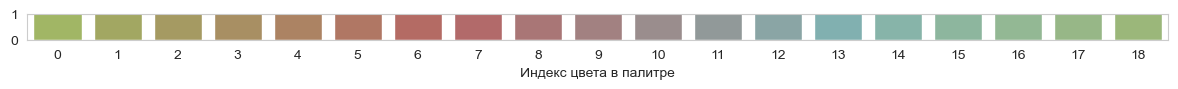

In [13]:
#строим график цветовой палитры, чтобы можно было "играть с цветами"
plt.figure(figsize=(12, 1))
sns.barplot(x=df.index, y=df['avg_dau'], palette=palette)
plt.ylim(0, 1)
plt.ylabel('')
plt.xlabel('Индекс цвета в палитре', fontsize=10)
plt.tight_layout()
plt.show()

Для линейчатых графиков можно применить различные цветовые гаммы, чтобы визуально разделить разные группы метрик. Сейчас у нас их две:
- **Характеристики контента** — показатели, относящиеся к публикации и показу роликов
- **Пользовательские метрики** — показатели, описывающие активность пользователей

Так как мы будем строить портрет пользователя, сразу определим индексы цветов для каждой группы:

- **Женщины** — цвет под индексом `8`
- **Мужчины** — цвет под индексом `13`
- **Дети** — зелёный цвет под индексом `1`
- **Взрослые** — приглушённый тёплый серый под индексом `11`

## Анализ метрик по категориям

Сначала рассмотрим все метрики отдельно друг от друга, чтобы увидеть, как распределены категории в разрезе разных показателей. Условно мы рассматриваем некий период времени, за который было опубликовано определённое количество контента — и также просмотрено. При этом просмотры могут включать ролики, опубликованные ранее.

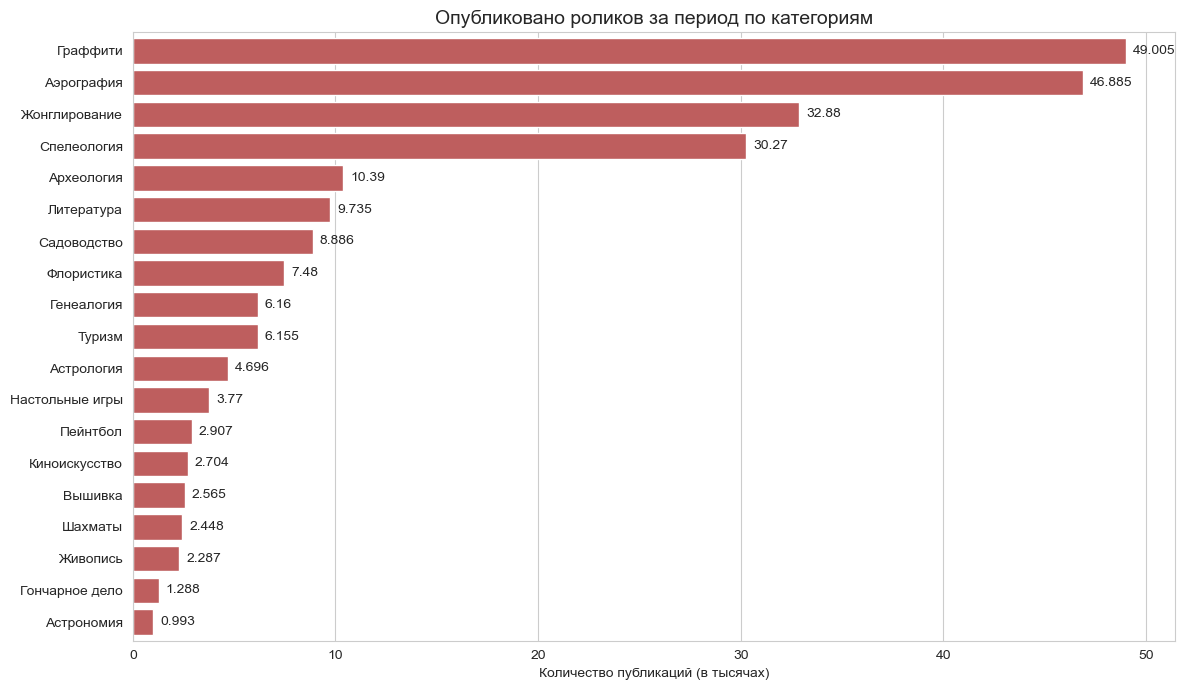

In [14]:
#опубликовано роликов
total_plot_barh(df, 7, 'published_videos',
                'Опубликовано роликов за период по категориям',
                'Количество публикаций (в тысячах)')

- Лидером по количеству публикаций можно назвать категорию `Граффити` и `Аэрография` с 49 005 и 46 885 роликами соответственно.  
- Немного отстают `Жонглирование` и `Спелеология`, но количество загруженных роликов превышает 30 тысяч в каждой категории.  
- В аутсайдеры попали `Астрономия` и `Гончарное дело`.


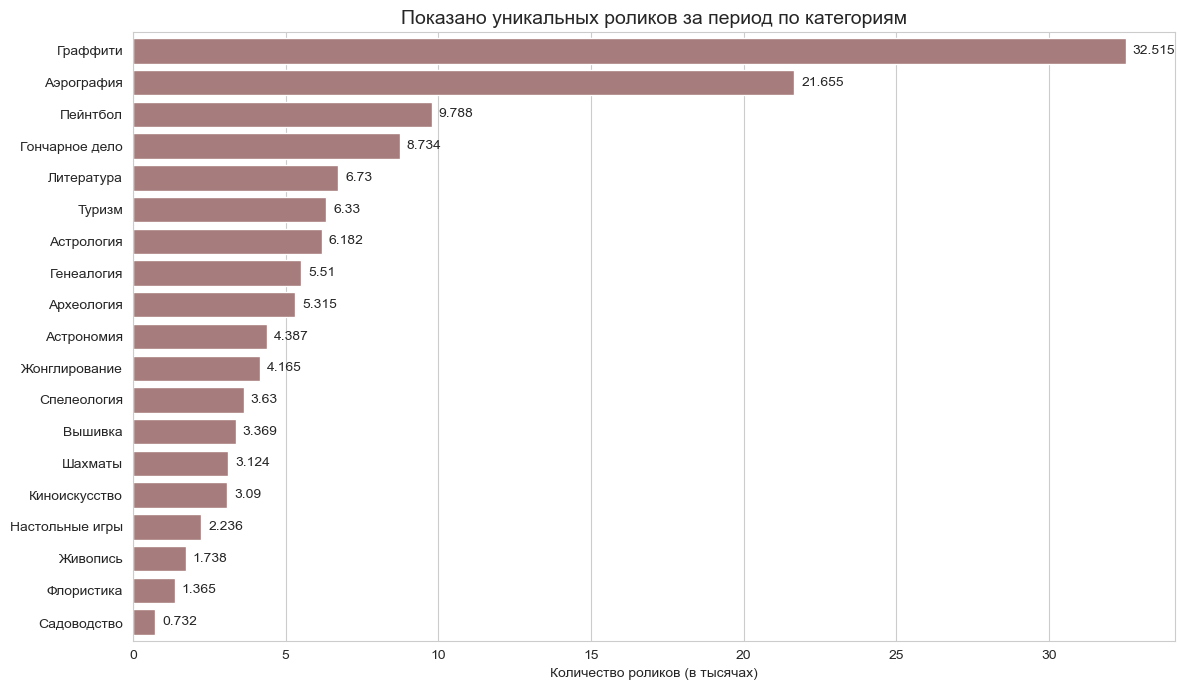

In [15]:
#показано роликов
total_plot_barh(df, 9, 'cnt_visible_videos',
                'Показано уникальных роликов за период по категориям',
                'Количество роликов (в тысячах)')

- По количеству показанных уникальных роликов также лидируют `Граффити` и `Аэрография`, однако между ними наблюдается значительный разрыв — 32 515 и 21 655 роликов соответственно.  
- А вот наименьшее количество уникальных роликов было показано в категориях `Садоводство`, `Флористика`, `Живопись` и `Настольные игры`. Это может свидетельствовать как о низкой популярности категорий, так и о том, что непросмотренных уникальных видео в них осталось немного. Ситуацию смогут раскрыть пользовательские метрики, указывающие на взаимодействие с контентом.  


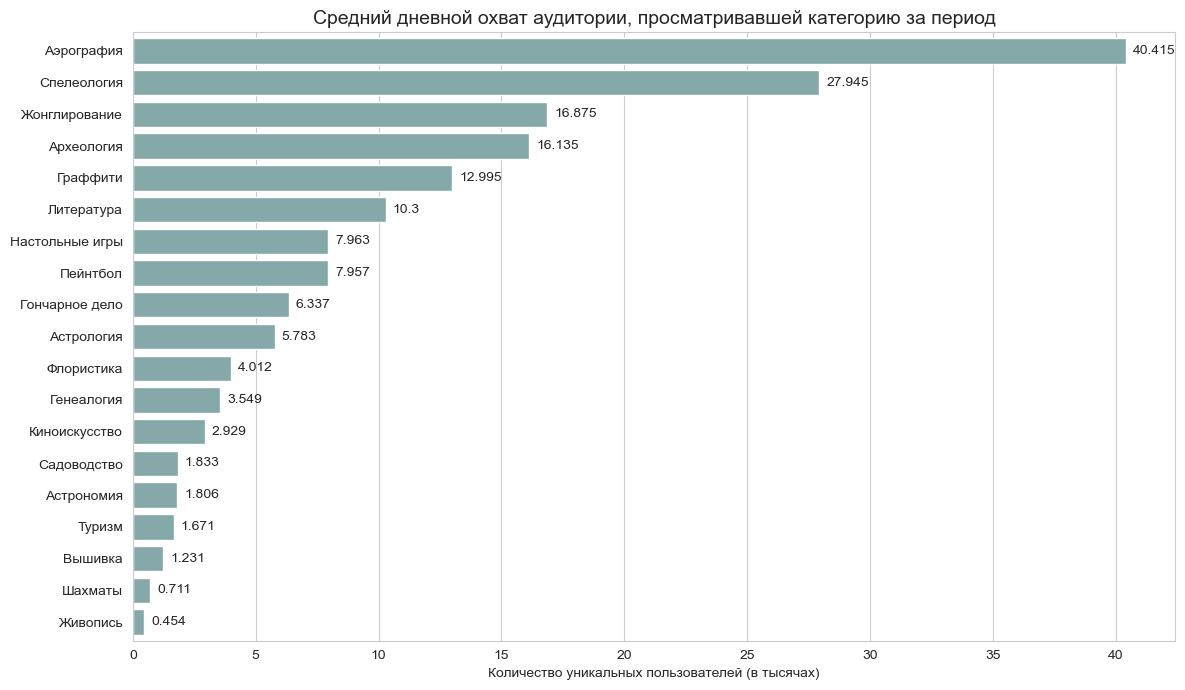

In [16]:
#среднее dau
total_plot_barh(df, 12, 'avg_dau',
                'Средний дневной охват аудитории, просматривавшей категорию за период',
                'Количество уникальных пользователей (в тысячах)')

- С внушительным отрывом по ежедневному охвату лидирует категория `Аэрография`, в среднем привлекая 40 415 уникальных пользователей в день.  
- На втором месте — уже знакомая `Спелеология` с 27 945 DAU. Разрыв между лидером и следующей категорией весьма заметен.  
- Меньше всего пользователей в категориях `Живопись`, `Шахматы` и `Вышивка`. Возможно, `Живопись` не уступает по метрикам вовлечённости на пользователя, но это станет ясно позже.  



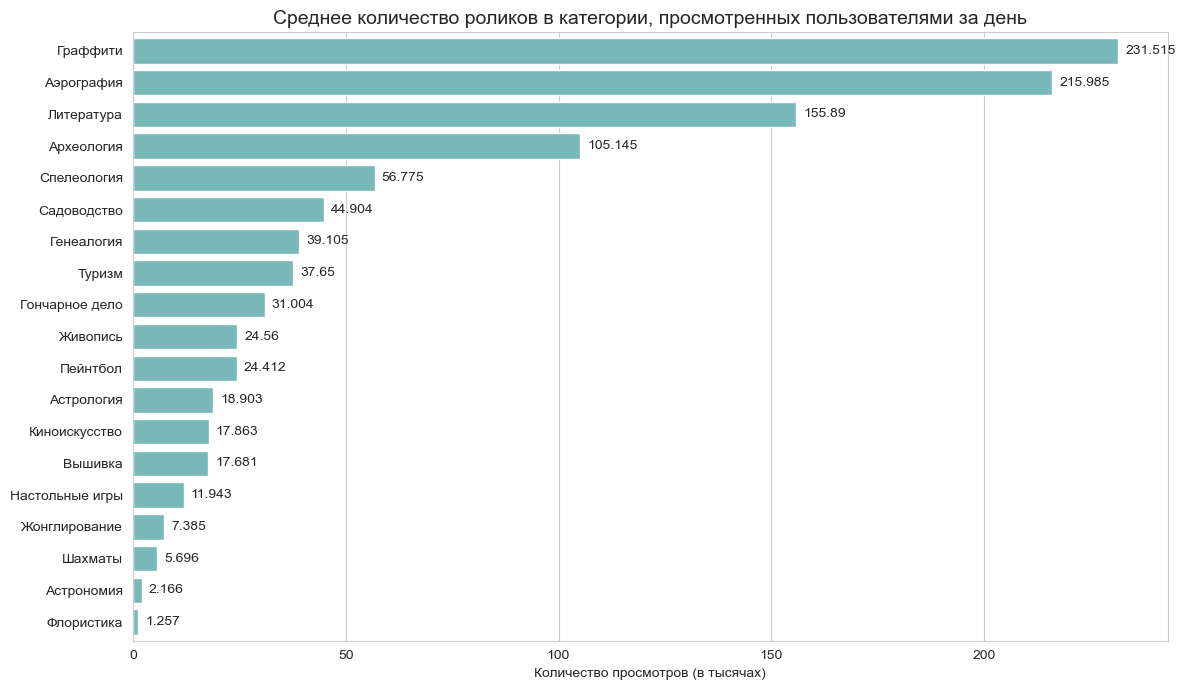

In [17]:
#cреднее количество показанных роликов
total_plot_barh(df, 13, 'avg_video_plays',
                'Среднее количество роликов в категории, просмотренных пользователями за день',
                'Количество просмотров (в тысячах)')

- И действительно, по среднему количеству просмотренных в день роликов `Живопись` вырывается из аутсайдеров, занимая 10-е место из 19 категорий с 24 560 просмотров в день.  
- Самые низкие значения по этой метрике у категорий `Флористика` и `Астрономия`.  
- А `Граффити` и `Аэрография` по-прежнему лидируют, в среднем за день набирая 231 515 и 215 985 просмотров соответственно.  

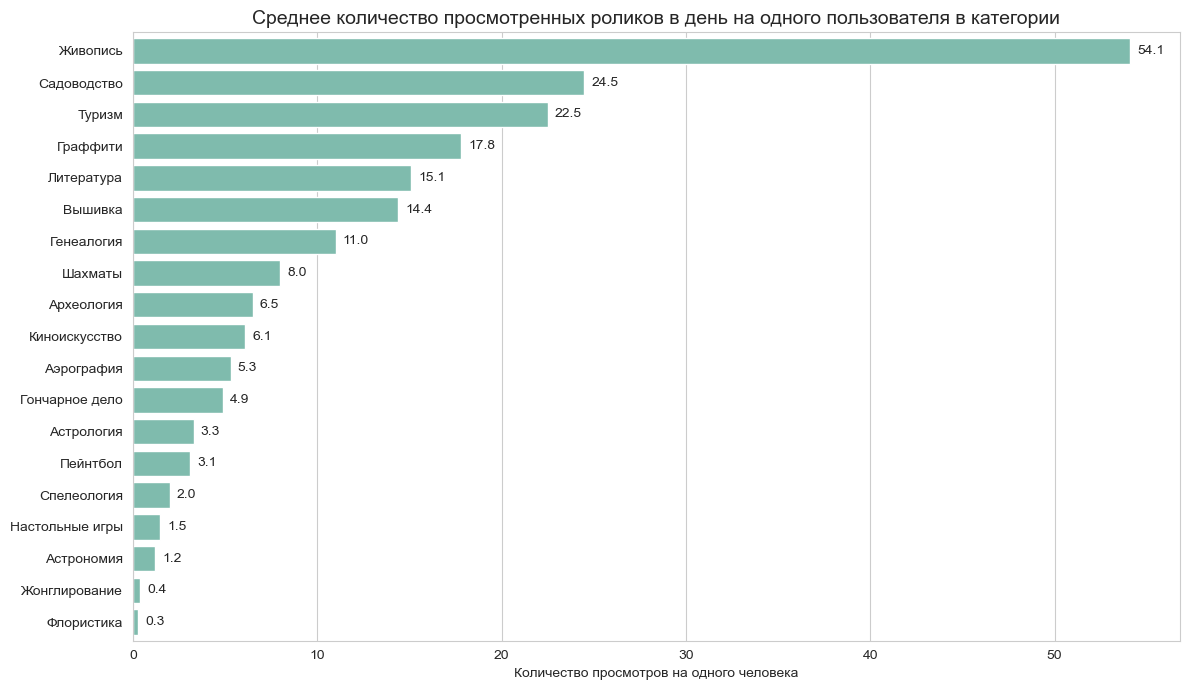

In [18]:
#cреднее количество показов на юзера
total_plot_barh(df, 14, 'avg_video_plays_per_user',
                'Среднее количество просмотренных роликов в день на одного пользователя в категории',
                'Количество просмотров на одного человека', total_data=False)

- Если рассмотреть `Живопись` по среднему количеству просмотренных роликов в день на пользователя, то категория выбивается в лидеры: в среднем человек, интересующийся этим направлением, просматривает 54 ролика в день только в этом сегменте!  
- С большим отрывом следуют `Садоводство` и `Туризм` — пользователи этих категорий смотрят в день в среднем 24,5 и 22,5 видео соответственно.  
- `Граффити` опустилась на 4-е место со средним количеством просмотров на пользователя — 17,8 роликов в день.  
- Меньше всего роликов смотрят пользователи категорий `Флористика` и `Жонглирование` — в среднем менее одного видео в день. Это значит, что в некоторые дни ролики из этих категорий могут не просматриваться совсем.  


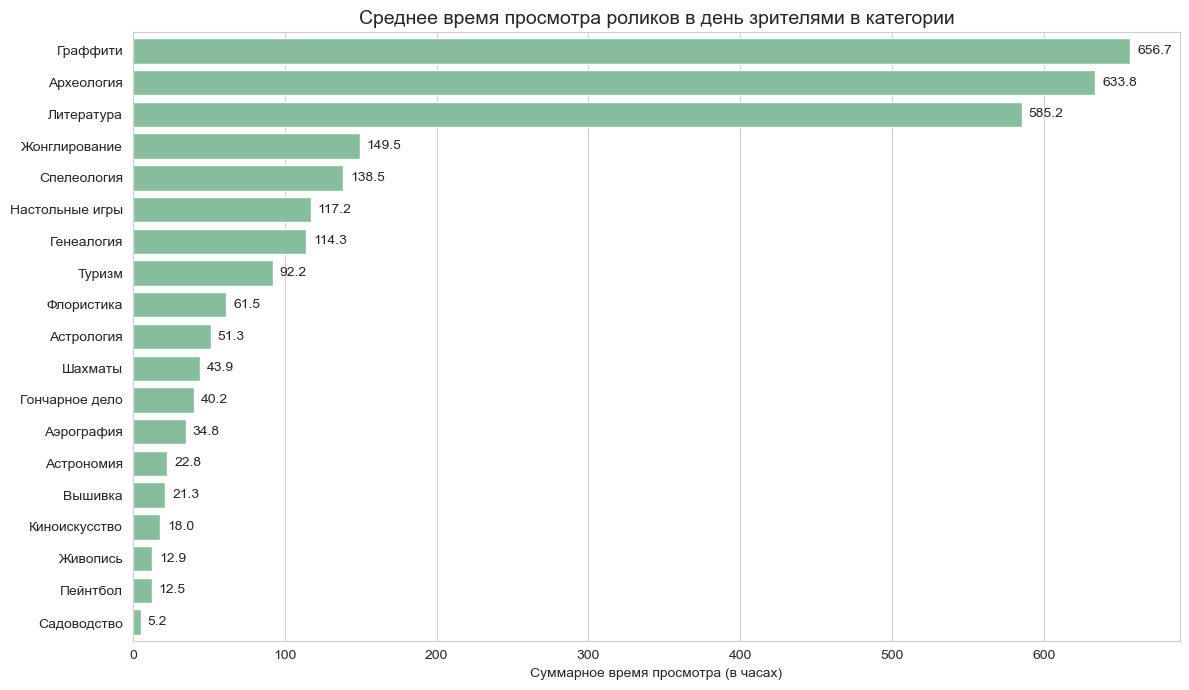

In [19]:
#cуммарное wt в день
total_plot_barh(df, 15, 'avg_wt_h',
                'Среднее время просмотра роликов в день зрителями в категории',
                'Суммарное время просмотра (в часах)', total_data=False)

- Дольше всего в среднем за день смотрят категории `Граффити`, `Археология` и `Литература`: почти 657, 634 и 585 часов соответственно.  
- Меньше всего времени пользователи проводят за видео из категорий `Садоводство`, `Пейнтбол` и `Живопись` — 5, 12,5 и почти 13 часов в день соответственно.  


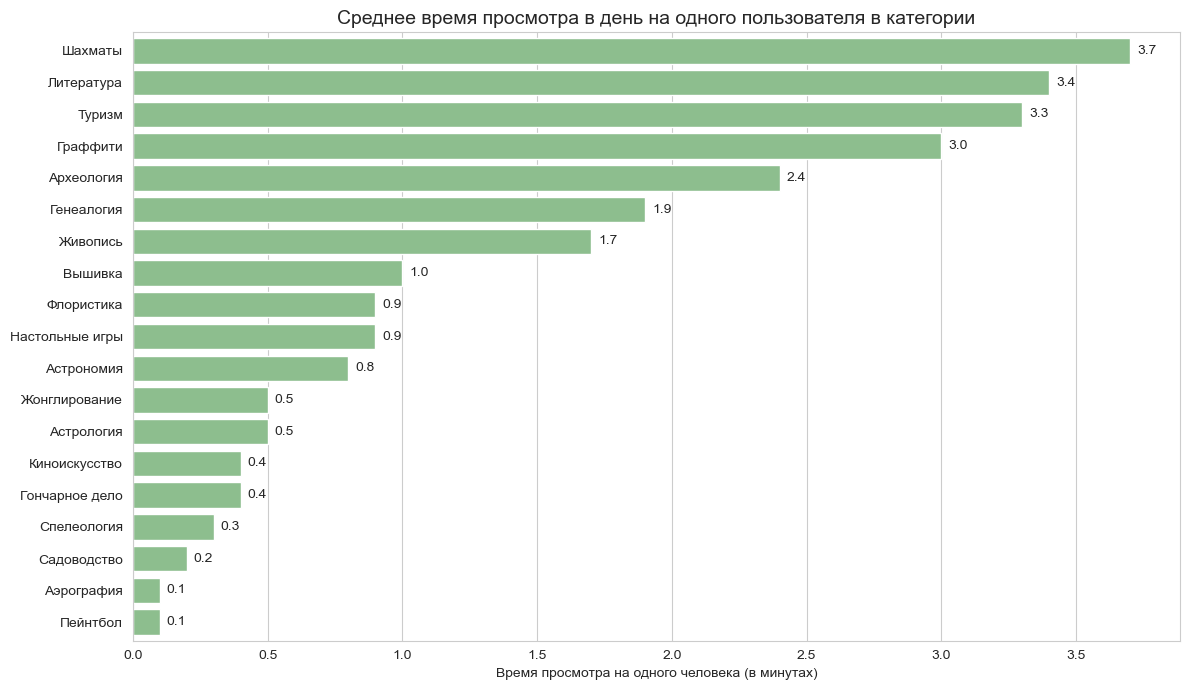

In [20]:
#cреднее время на юзера
total_plot_barh(df, 16, 'avg_wt_per_user',
                'Среднее время просмотра в день на одного пользователя в категории',
                'Время просмотра на одного человека (в минутах)', total_data=False)

- А при пересчёте времени, проведённого на одного пользователя в категории, видно, что дольше всего смотрят `Шахматы`, `Литературу` и `Туризм` — более 3 минут в день на человека.  
- `Граффити` смотрят в среднем по 3 минуты в день, а `Живопись` — 1,7 минуты.  
- Меньше всего времени на пользователя приходится в категориях:  
  - `Пейнтбол` и `Аэрография` — 6 секунд в день,  
  - `Садоводство` — 12 секунд,  
  - `Спелеология` — 18 секунд.  


## Соотношение метрик и определение лидеров

Теперь мы рассмотрим соотношение метрик друг к другу на точечных графиках, так как они позволяют наглядно оценить распределение категорий. Удобство таких графиков в том, что можно изменять масштаб, чтобы детальнее рассмотреть участки с плотным скоплением точек. Для этого достаточно нажать на категорию с максимальными показателями в легенде справа — она скроется, а график автоматически приблизит остальные точки.

Линии медианы и перцентилей помогут определить, к какой группе относится категория относительно других. 75-й перцентиль выделен цветом, чтобы подчеркнуть категории с самыми высокими значениями. В дальнейшем на основе этих данных мы сможем построить портреты пользователей и детальнее изучить их особенности.

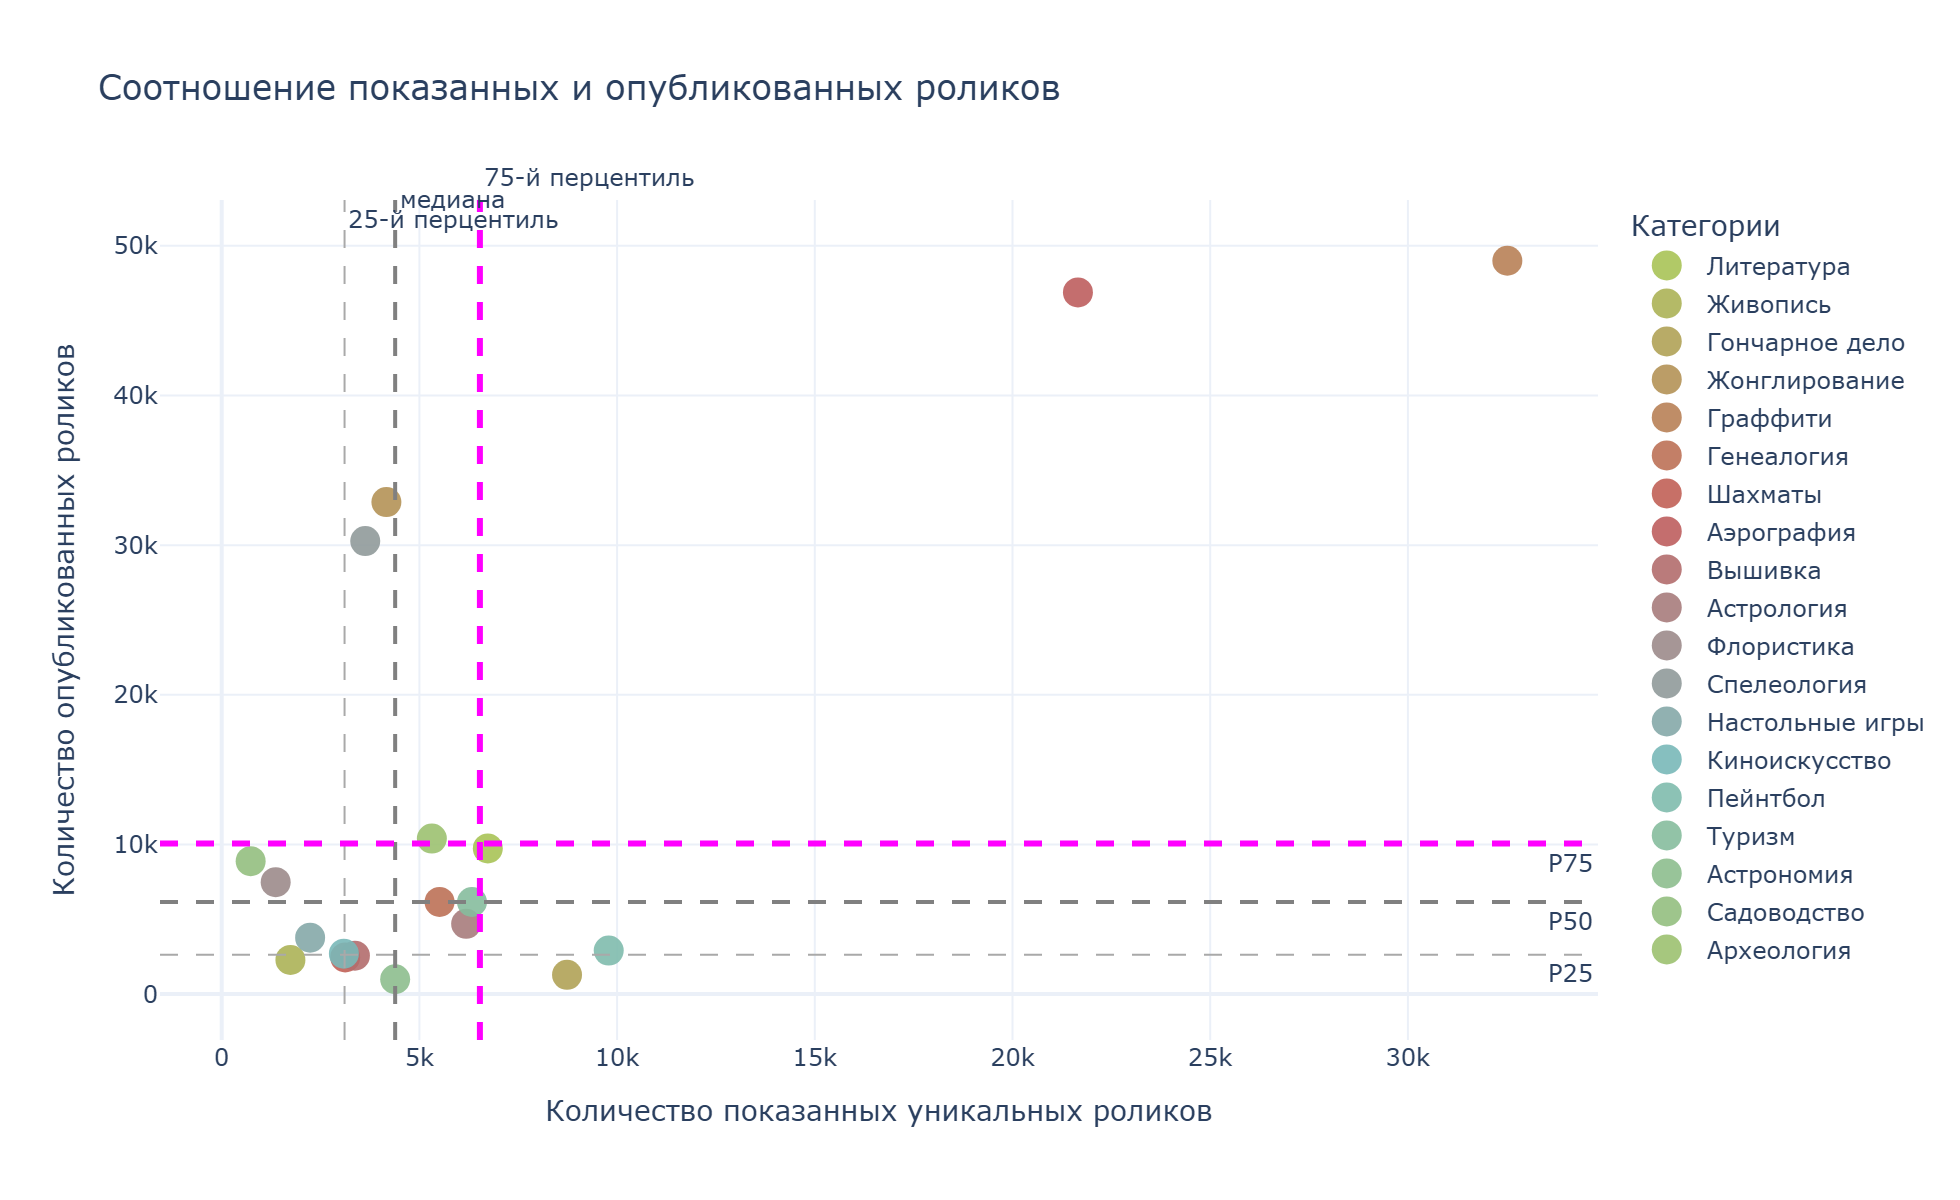

In [21]:
#опубликованные к показанным
scatter_plotly(df, 'Соотношение показанных и опубликованных роликов',
               'cnt_visible_videos', 'Количество показанных уникальных роликов', 'Показано',
               'published_videos', 'Количество опубликованных роликов', 'Загружено')

На этом графике видно, что абсолютными лидерами, попадающими за 75-й перцентиль по количеству публикуемого контента и количеству просмотров, являются категории `Граффити` и `Аэрография`. Они настолько значительно опережают остальные категории, что их присутствие сильно влияет на масштаб сетки графика, делая различия между другими категориями менее заметными.  

Чтобы улучшить визуальное восприятие данных и детальнее рассмотреть распределение среди остальных категорий, скроем `Граффити` и `Аэрографию` в легенде справа.  

По медианному значению можно выделить категории `Литература`, `Археология`, `Туризм` и `Генеалогия`.  



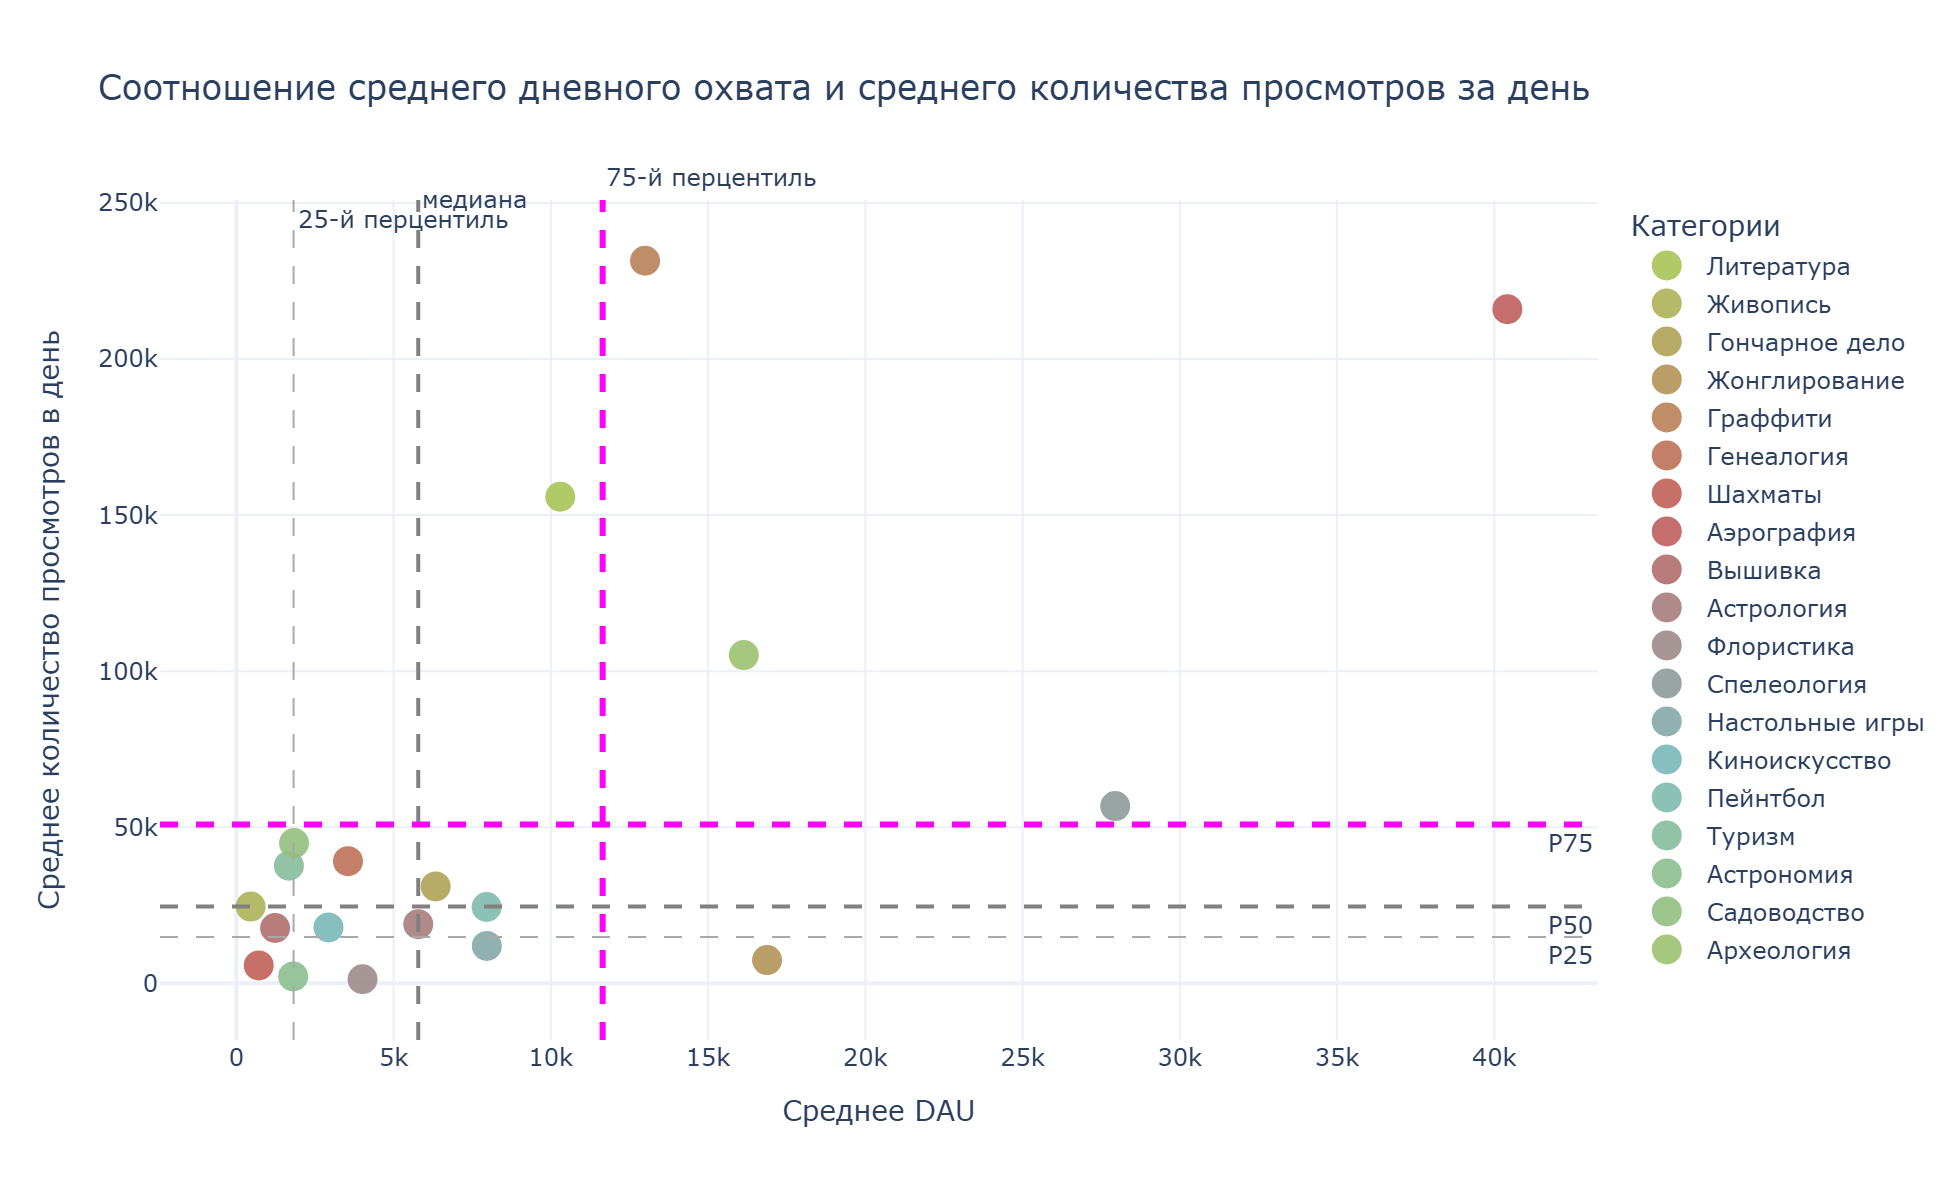

In [22]:
#dau к показам
scatter_plotly(df, 'Соотношение среднего дневного охвата и среднего количества просмотров за день',
               'avg_dau', 'Среднее DAU', 'DAU',
               'avg_video_plays', 'Среднее количество просмотров в день', 'Просмотрено')

А вот на пересечении метрик DAU и средним количеством просмотров с повторами мы видим, что в 75 перцентиль попадают категории `Аэрография`, `Граффити`, `Археология` и `Спелеология`.  
По медиане ещё проходят по высоким показателям `Литература`, `Гончарное дело` и `Пейнтбол`.  


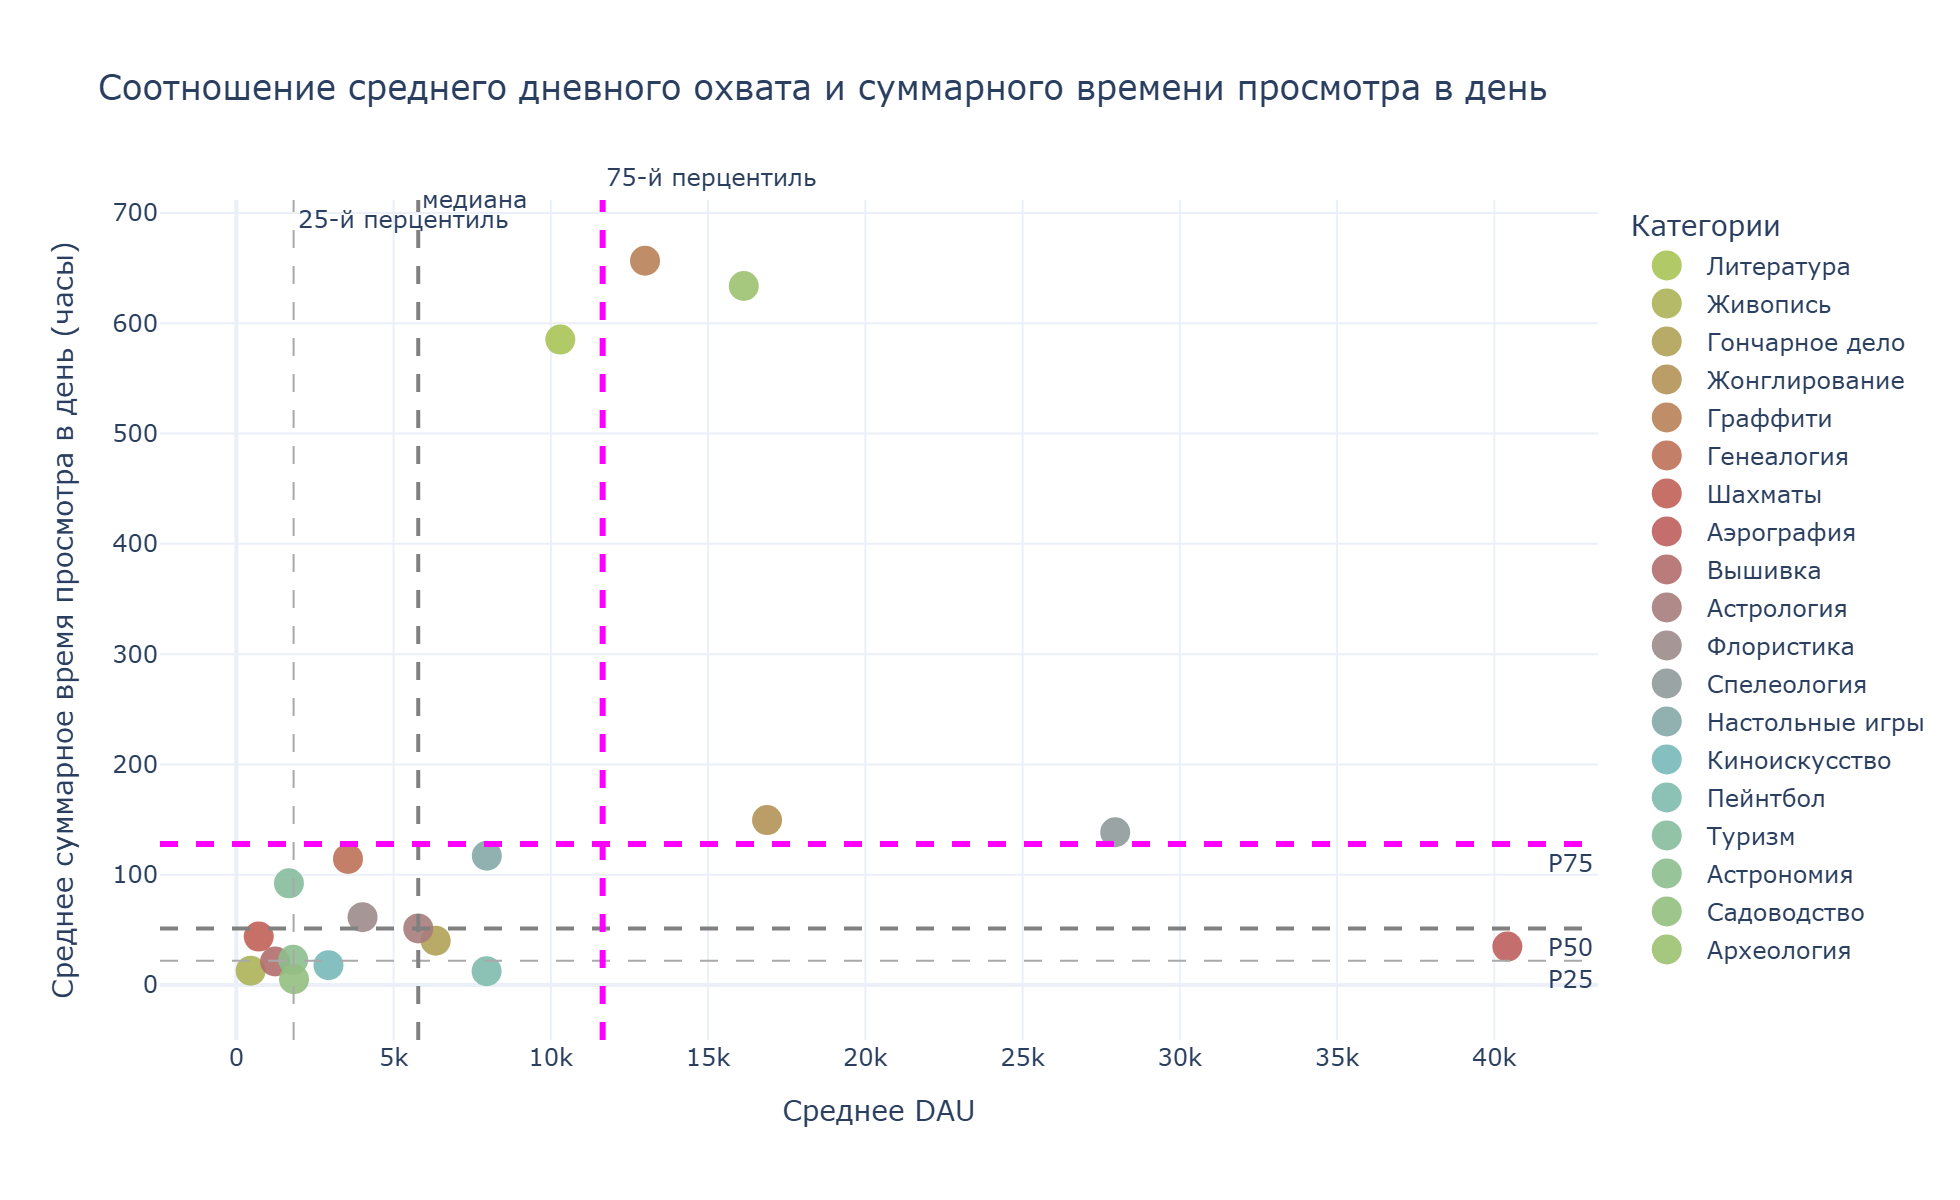

In [23]:
#dau к wt
scatter_plotly(df, 'Соотношение среднего дневного охвата и суммарного времени просмотра в день',
               'avg_dau', 'Среднее DAU', 'DAU',
               'avg_wt_h', 'Среднее суммарное время просмотра в день (часы)', 'WT')

При анализе пересечения среднего дневного охвата и суммарного времени просмотра в 75-й перцентиль входят категории `Граффити`, `Археология`, `Спелеология` и `Жонглирование`.  
В медианном диапазоне также оказались `Настольные игры`, а `Астрология` приближается к этому уровню.  


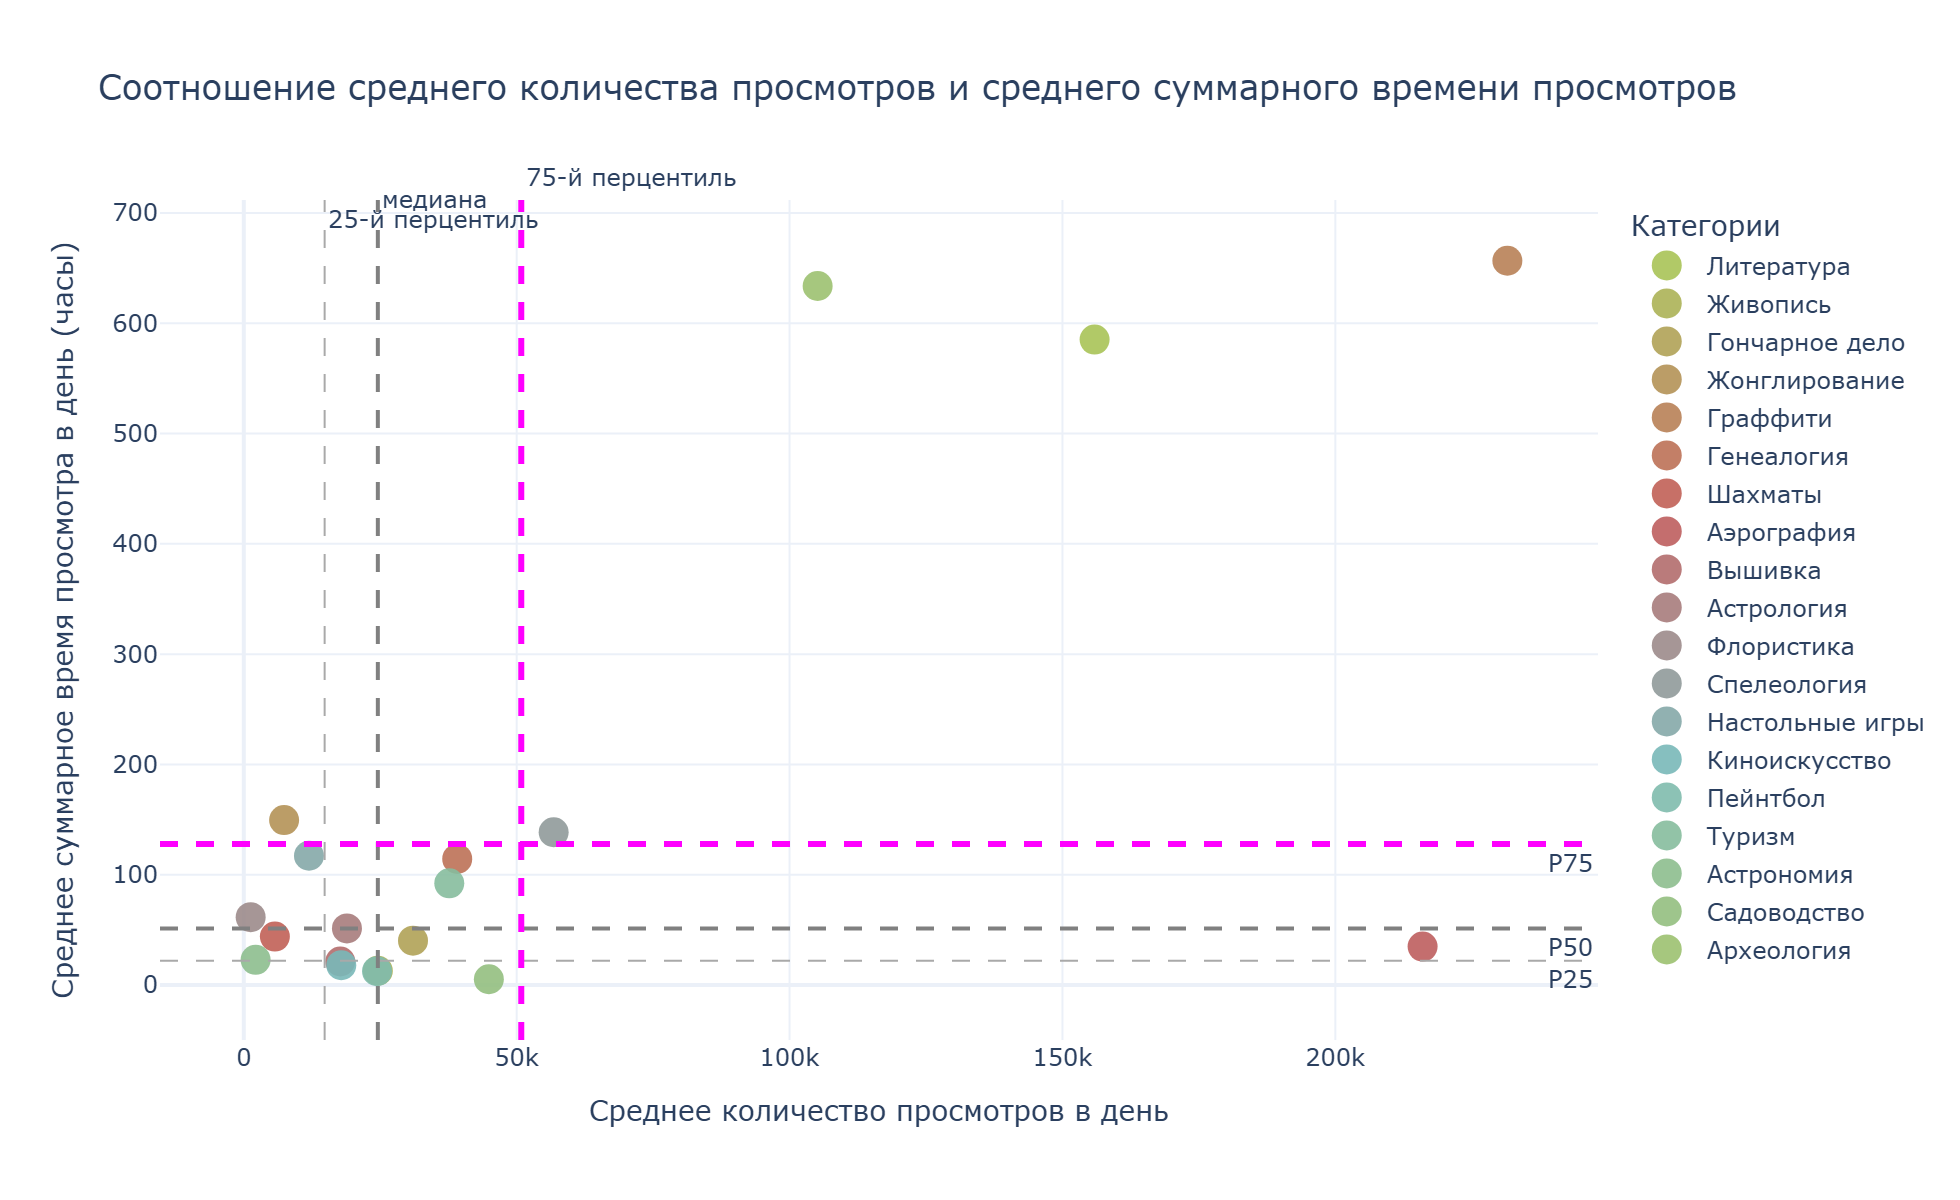

In [24]:
#показы к wt
scatter_plotly(df, 'Соотношение среднего количества просмотров и среднего суммарного времени просмотров',
               'avg_video_plays', 'Среднее количество просмотров в день', 'Просмотрено',
               'avg_wt_h', 'Среднее суммарное время просмотра в день (часы)','WT')

На графике, отражающем соотношение среднего количества просмотренных роликов и среднего суммарного времени просмотра, в 75-й перцентиль входят категории `Граффити`, `Литература`, `Археология` и `Спелеология`.  
По медианному значению также выделяются `Генеалогия` и `Туризм`.  


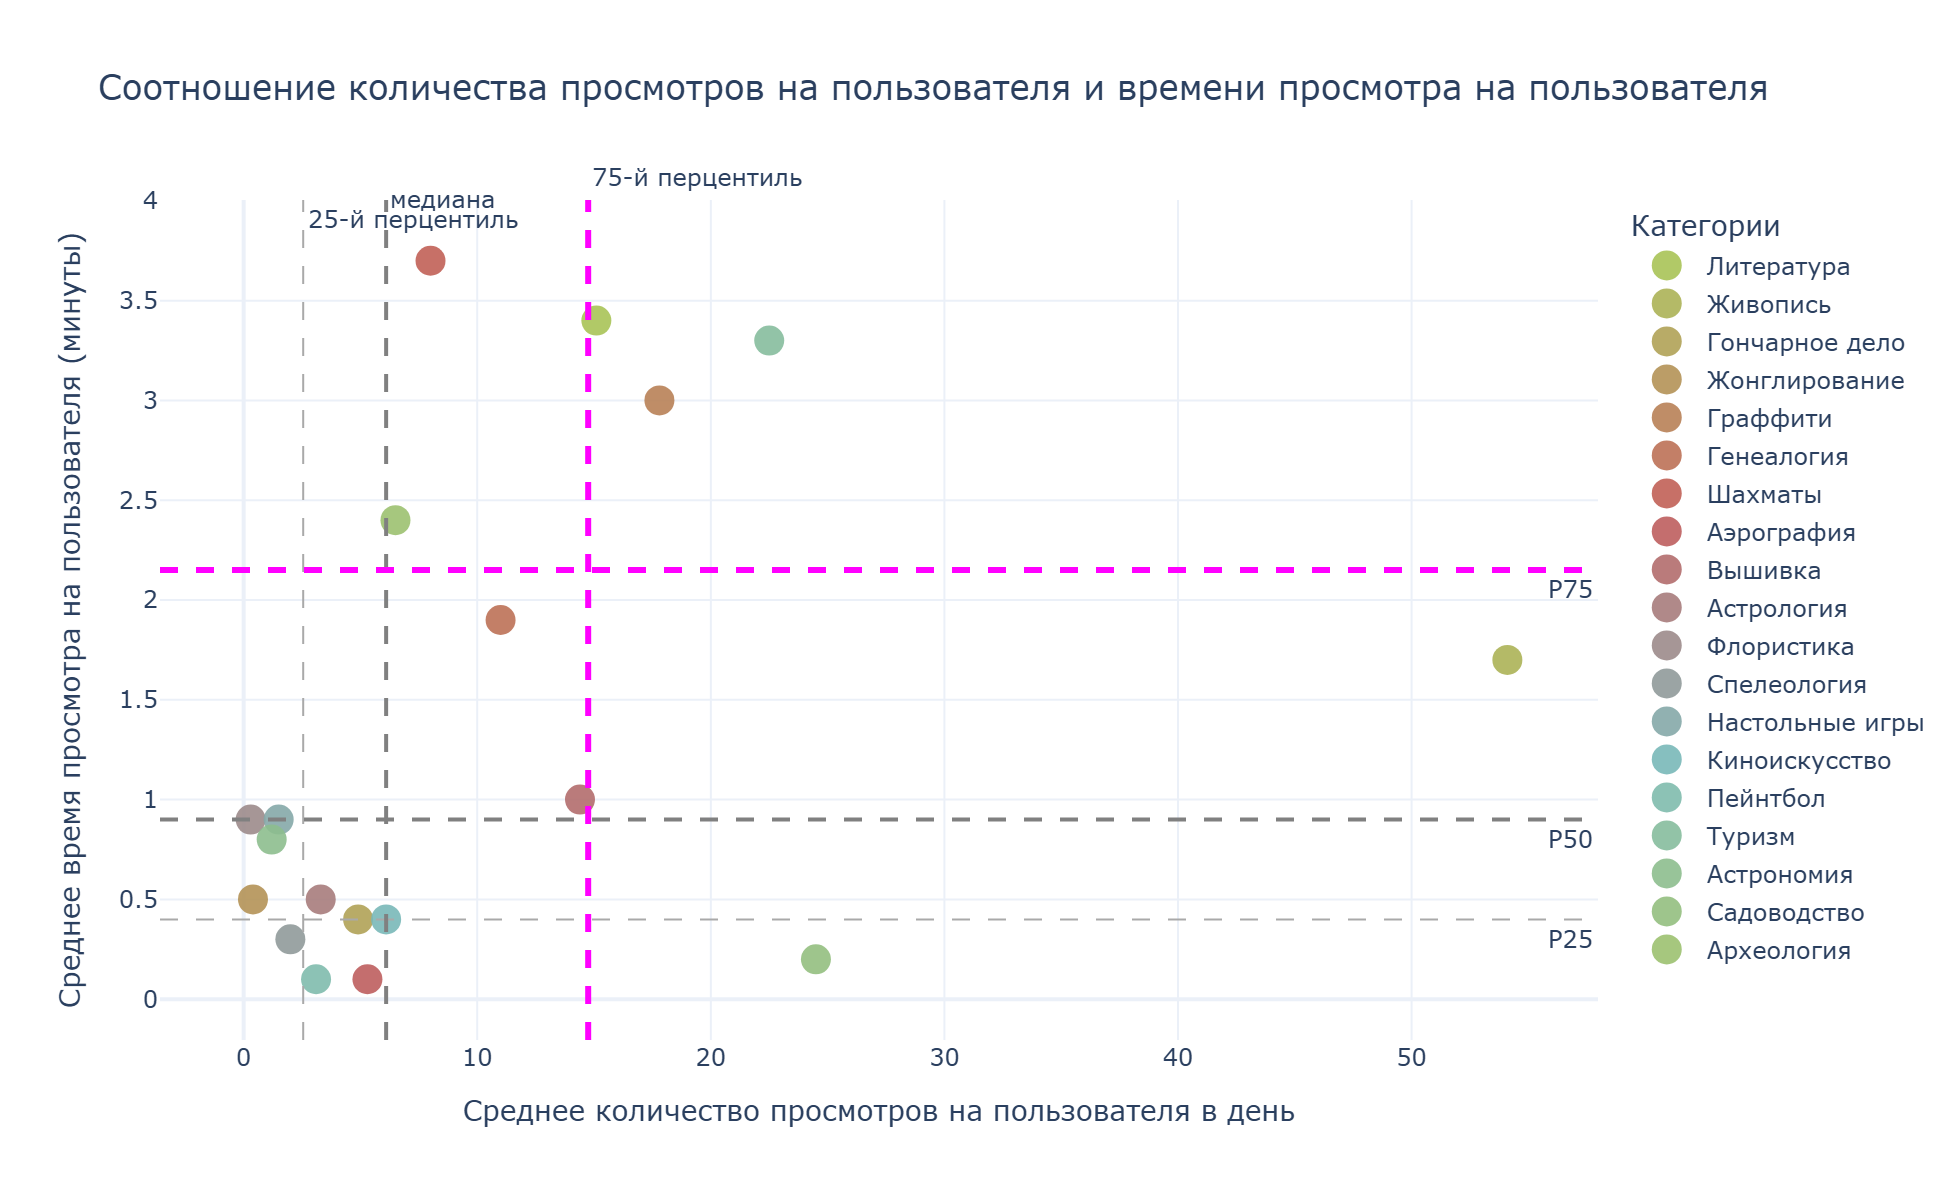

In [25]:
#количество показов на юзера к wt на юзера
scatter_plotly(df, 'Соотношение количества просмотров на пользователя и времени просмотра на пользователя',
               'avg_video_plays_per_user', 'Среднее количество просмотров на пользователя в день', 'Просмотрено',
               'avg_wt_per_user', 'Среднее время просмотра на пользователя (минуты)','WT')

Этот график объединяет сразу три метрики, поскольку при расчёте количества просмотренных роликов на пользователя и среднего времени просмотра на пользователя учитывался ежедневный охват по категории.  

В 75-й перцентиль входят категории `Туризм`, `Граффити` и `Литература`.  
По медианному значению также выделяются `Живопись`, `Шахматы`, `Генеалогия`, `Археология` и `Вышивка`.  


## Портрет пользователей топовых категорий

На основе рассмотренных ранее графиков можно выделить несколько наиболее перспективных категорий и детальнее изучить, как распределяются ключевые метрики внутри этих категорий в разрезе возрастных и гендерных групп.  

Каждый пользовательский портрет включает в себя:  
- **Среднее количество уникальных пользователей (DAU)** — распределение по полу и возрасту.  
- **Среднее количество просмотренных роликов (video_plays)** — общее значение и в расчёте на пользователя.  
- **Среднее время просмотра (WT)** — общее значение и в расчёте на пользователя.  

Эти показатели помогут определить, какие группы пользователей вносят наибольший вклад в популярность категории. При необходимости можно оперативно добавить портреты для других категорий, чтобы выявить потенциальные точки роста в менее активных сегментах.  

Поскольку искусственно сгенерированные портреты пользователей не дадут значимых инсайтов, рассмотрим две категории, которые особенно выделились в текущем анализе:  
- `Граффити` — стабильно лидирует по нескольким показателям и регулярно попадает в 75-й перцентиль на точечных графиках.  
- `Живопись` — демонстрирует резкие изменения позиций: от аутсайдера до лидера в зависимости от рассматриваемых пользовательских метрик. Портрет аудитории может помочь выявить точки роста для этой категории.  


In [26]:
#создаём словарь с индексами цветов
color_indices = {'sex': [13, 8],   #индексы цветов для полов (мужчины/женщины)
                 'age': [1, 11]}   #индексы цветов для возрастных групп (дети/взрослые)

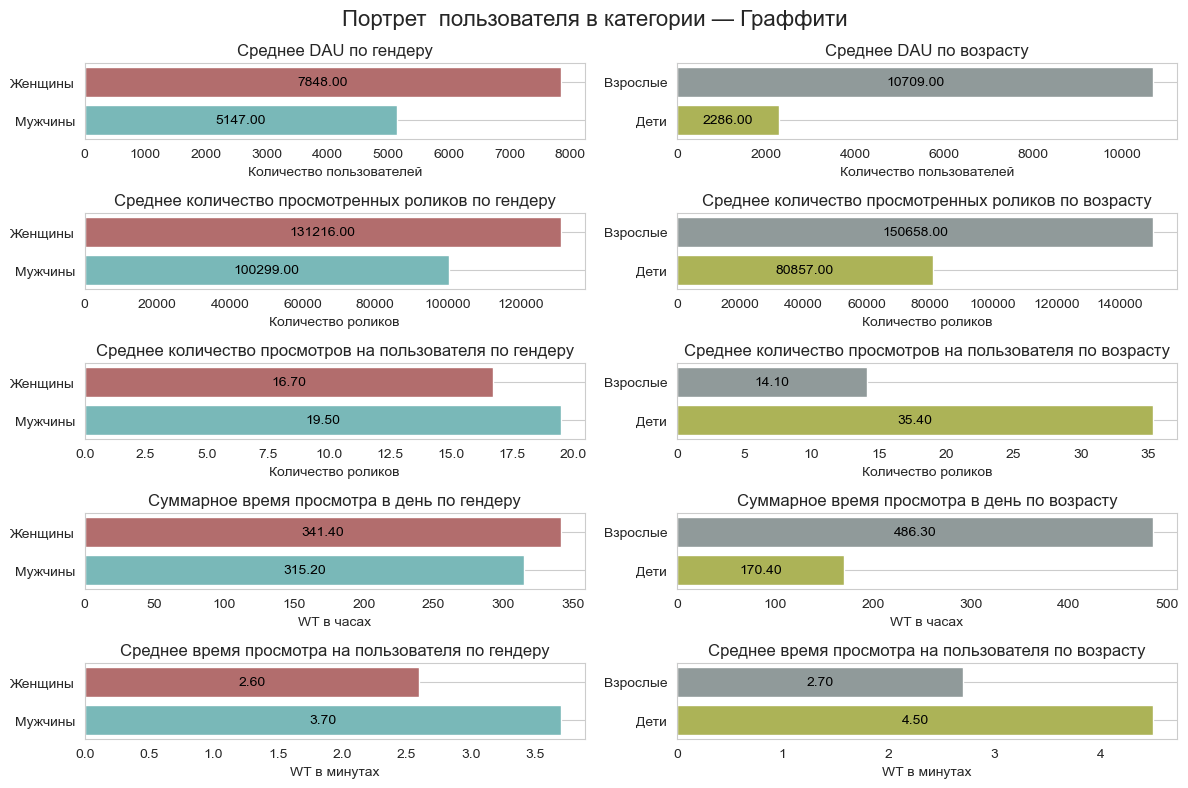

In [27]:
#портрет пользователя по категории - Граффити
plot_bar_graphs(df, '', 'Граффити', color_indices)

- В среднем ежедневном пользовательском охвате категории `Граффити` лидируют взрослые женщины. Гендерная разница относительно невелика: 7 848 против 5 147 человек. Однако доля детей, интересующихся категорией, существенно ниже: 10 709 против 2 286 человек.  
- Среднее количество просмотренных роликов также выше среди взрослых женщин.  
- Однако если пересчитать количество роликов на одного пользователя, то лидируют мальчики. Это может указывать на более высокий уровень вовлечённости среди этой группы, что потенциально требует дополнительного изучения.  
- По суммарному времени просмотра категории за день также лидируют взрослые женщины, но их отрыв от мужчин незначителен.  
- А вот при пересчёте среднего времени просмотра на пользователя в минутах мальчики демонстрируют наибольшую продолжительность просмотра роликов из этой категории.  

Это может говорить, например, о разнице в стиле потребления контента: взрослые женщины смотрят больше, но менее интенсивно, а мальчики — реже, но дольше за раз.

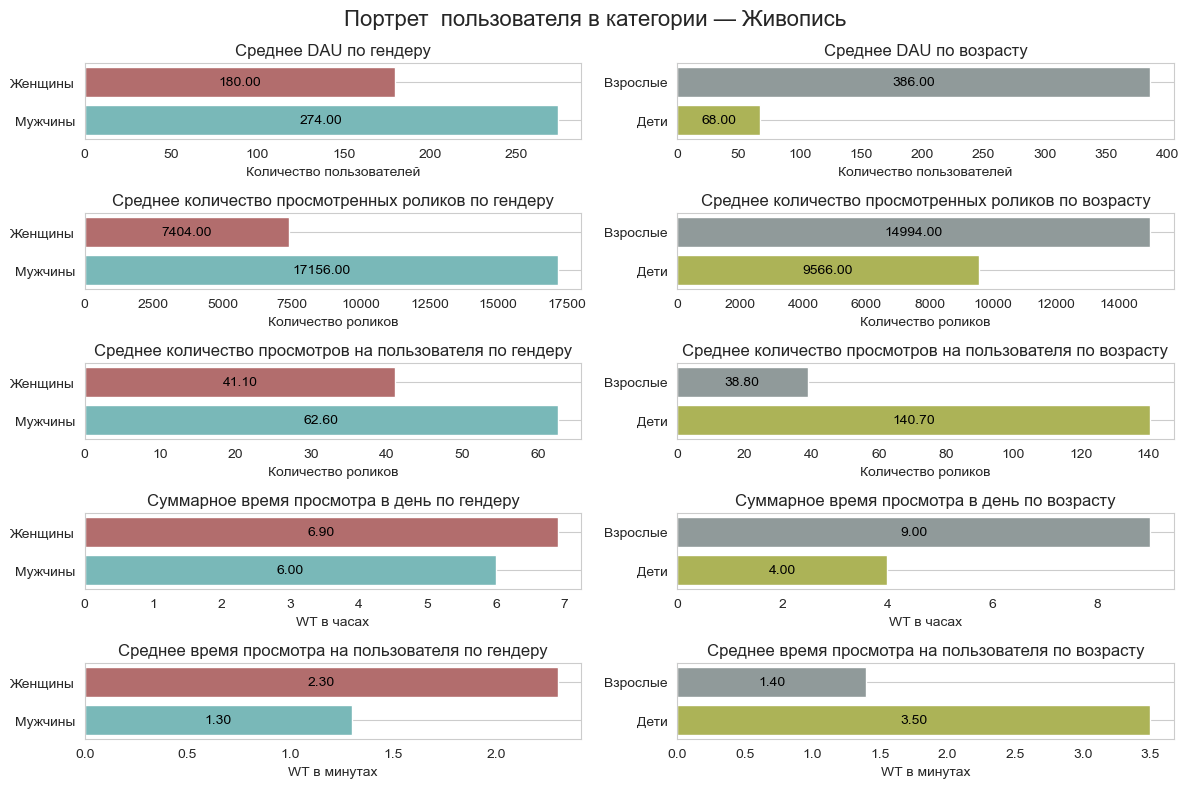

In [28]:
#портрет пользователя по категории - Живопись
plot_bar_graphs(df, '', 'Живопись', color_indices)

А теперь рассмотрим `Живопись`.  
- По охватам наибольший интерес к категории проявляют взрослые мужчины, хотя в целом количество зрителей невелико: 274 пользователя мужского пола против 180 женского. Однако соотношение взрослых к детям внушительное: 386 против 68.  
- Стоит обратить внимание, что при таком небольшом количестве зрителей в среднем за день просматривается 17 156 видео — и это только среди мужчин. Они также преобладают по этой метрике, хотя доля детей выше.  
- Это подтверждается при пересчёте среднего количества роликов на человека: дети могут смотреть по 140,7 роликов в день в этой категории.  
- По суммарному времени просмотра в день лидируют взрослые, преимущественно женщины (женщины смотрят почти 7 минут в день, мужчины — в среднем по 6 минут). В целом взрослые проводят в категории около 9 минут в день.  
- Однако из-за небольшого числа детей, интересующихся этой категорией, средняя длительность просмотра на человека составляет 3,5 минуты в день. Судя по распределению полов, чаще всего это девочки.  

Здесь интересно, что дети смотрят больше роликов, но взрослые проводят в категории больше времени. Это может говорить о разнице в формате потребления контента: дети листают видео быстрее, а взрослые дольше задерживаются на отдельных роликах.

# Общие выводы
- Лидеры по количеству контента — категории Граффити и Аэрография, значительно опережающие остальные по числу публикаций и показов.
- Живопись выбивается в топ по вовлечённости — несмотря на малый охват, её зрители смотрят рекордное количество роликов на пользователя.
- Аэрография привлекает наибольший охват (DAU), но по времени просмотра на пользователя лидируют Шахматы, Литература и Туризм.
- Категории с высоким потреблением контента — Граффити, Археология, Литература, Туризм, что отражается в их сильных позициях по просмотрам и вовлечённости.
В категории Живопись дети чаще листают короткие ролики, а взрослые дольше задерживаются на просмотре, особенно в Граффити и Литературе.
Некоторые категории: Флористика, Астрономия, Жонглирование — почти не привлекают внимание, о чём говорят низкие просмотры.

### Рекомендации
- **Оптимизация алгоритмов рекомендаций**
  - Усилить персонализацию для категорий с высоким вовлечением (Живопись, Граффити, Литература)
  - Выявить и протестировать дополнительные факторы удержания пользователей в лидирующих категориях
- **Развитие нишевых категорий**
  - Уточнить причины низкого интереса к Флористике, Астрономии и Жонглированию
  - Рассмотреть механики вовлечения (подборки, челленджи) для улучшения показателей
- **Монетизация контента**
  - Категории с высоким временем просмотра на пользователя (Шахматы, Литература, Туризм) подходят для долгих рекламных интеграций
  - Живопись и Граффити — перспективны для промо-акций, учитывая частоту потребления контента
- **Анализ моделей потребления**
  - Различие в поведении детей и взрослых можно учесть при разработке нового функционала (например, плейлисты для длительного просмотра или быстрые подборки)
  - Оценить, насколько повторно потребляется контент, особенно в категориях с низким числом уникальных видео